# A fast velocity computation

## Makes a synthetic set

In [1]:
import MotionClouds as mc
N_X, N_T = 64, 128
fx, fy, ft = mc.get_grids(N_X, N_X, 1)
env = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0)
z = 2 * mc.rectif(mc.random_cloud(env, seed=1973))[0, :] - 1

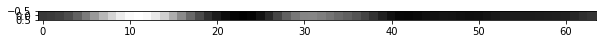

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(z.T, cmap=plt.gray())

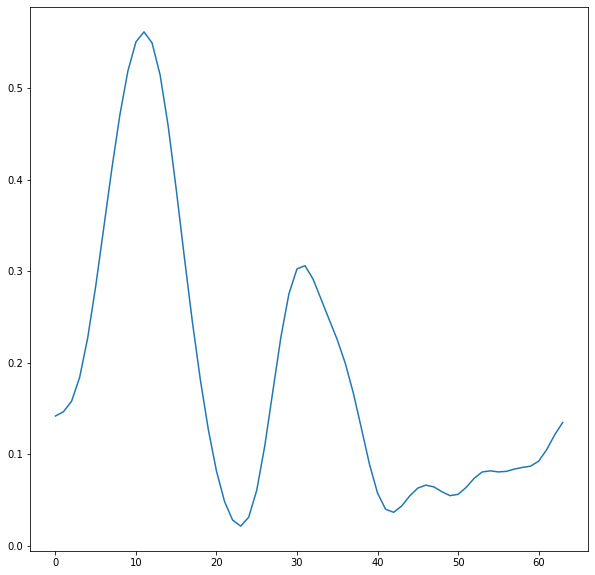

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.plot(z)

In [4]:
import numpy as np

In [5]:
I = np.zeros((N_X, N_T))
for i_T in range(N_T):
    I[:, i_T] = np.roll(z, i_T)[:, 0]

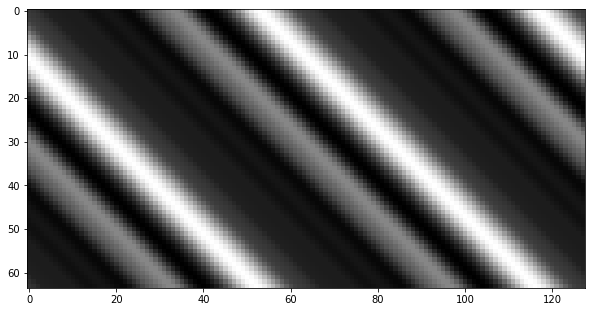

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(I, cmap=plt.gray())

## transform to events

In [7]:
np.gradient?

Signature: np.gradient(f, *varargs, axis=None, edge_order=1)
Docstring:
Return the gradient of an N-dimensional array.

The gradient is computed using second order accurate central differences
in the interior points and either first or second order accurate one-sides
(forward or backwards) differences at the boundaries.
The returned gradient hence has the same shape as the input array.

Parameters
----------
f : array_like
    An N-dimensional array containing samples of a scalar function.
varargs : list of scalar or array, optional
    Spacing between f values. Default unitary spacing for all dimensions.
    Spacing can be specified using:

    1. single scalar to specify a sample distance for all dimensions.
    2. N scalars to specify a constant sample distance for each dimension.
       i.e. `dx`, `dy`, `dz`, ...
    3. N arrays to specify the coordinates of the values along each
       dimension of F. The length of the array must match the size of
       the corresponding dimensio

In [8]:
print(I.min(), I.max())

0.02129415297357906 0.5618857112973188


In [9]:
noise = 0.02
I += noise * np.random.randn(N_X, N_T)

In [10]:
#I[20:40, 40:80] = 0
#Ix = np.gradient(I, axis=0)
It = np.gradient(I, axis=1)

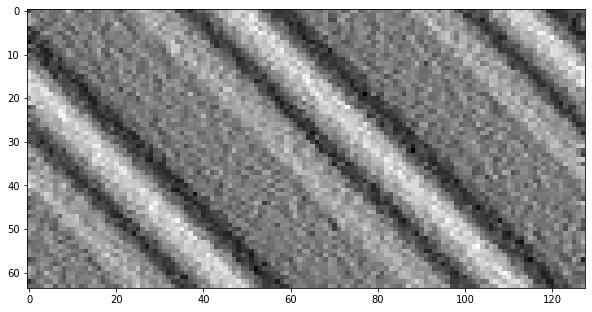

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(It, cmap=plt.gray())

In [12]:
print(It.min(), It.max())

-0.10854555833523288 0.10802147659593328


In [13]:
threshold = 0.05

In [14]:
It_ = It.copy()
It_event = np.zeros((N_X, N_T))
for i_T in range(N_T-1):
    It_event[:, i_T] = 1. * (It_[:, i_T] > threshold) - 1. * (It_[:, i_T] < -threshold)
    It_[:, i_T+1] -= threshold * It_event[:, i_T]
#It_event[:, -1] = 0

In [15]:
print(It_event.min(), It_event.max())
print(It_.min(), It_.max())

-1.0 1.0
-0.09592639858962032 0.10521818645002545


In [16]:
np.lookfor('seismic')

Search results for 'seismic'
----------------------------
Nothing found.


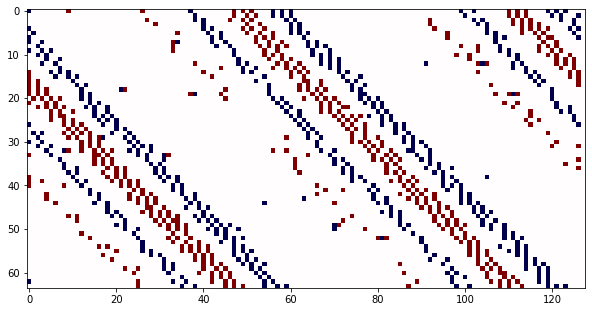

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(It_event, cmap=plt.cm.seismic, vmin=-1, vmax=1)

In [18]:
It_event[:, 0], It_event[:, 10], It_event[:, -1]



(array([-1.,  0.,  0.,  0., -1.,  0., -1., -1.,  0., -1.,  0.,  0.,  0.,
         0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        -1.,  0.,  0.,  0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

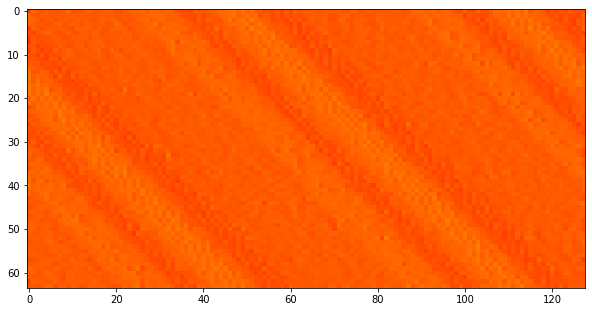

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(It_, cmap=plt.hot(), vmin=-1, vmax=1)

## motion compensated transform on events

In [31]:
It_v = np.zeros((N_X, N_T))
V = .1
for i_T in range(N_T):
    It_v[:, i_T] = np.roll(It_event[:, i_T], -int(V*i_T))

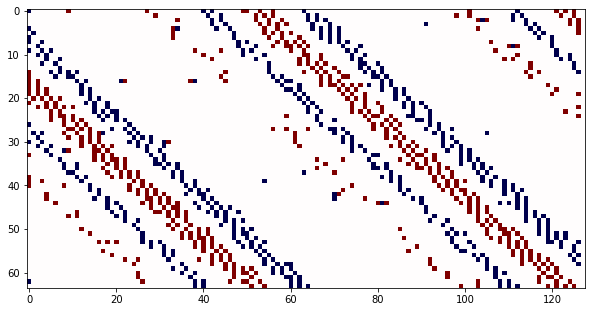

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(It_v, cmap=plt.cm.seismic, vmin=-1, vmax=1)

In [33]:
It_v[:, 0]

array([-1.,  0.,  0.,  0., -1.,  0., -1., -1.,  0., -1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.])

In [34]:
p_V_plus = np.sum(It_v==1, axis=1)*1.
p_V_minus = np.sum(It_v==-1, axis=1)*1.

p_V_plus /= np.sum(p_V_plus)
p_V_minus /= np.sum(p_V_minus)

In [35]:
np.sum(p_V_minus)

1.0

(0.0, 0.02435200594529851)

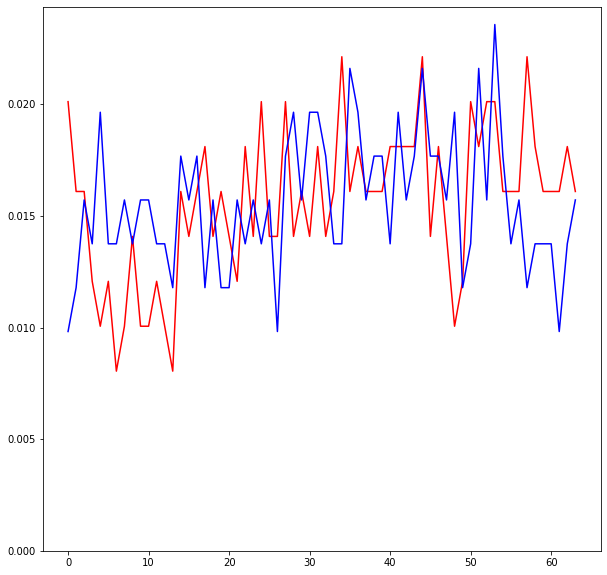

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(p_V_plus, c='r')
ax.plot(p_V_minus, c='b')
ax.set_ylim(0)

In [37]:
entropy = -np.sum( p_V_minus * np.log2(p_V_minus + 1.*(p_V_minus==0)) )
entropy += -np.sum( p_V_plus * np.log2(p_V_plus + 1.*(p_V_plus==0)) )

In [38]:
entropy

11.938339343644182

## gradient descent optimization

In [43]:
import torch
torch.roll?

Docstring:
roll(input, shifts, dims=None) -> Tensor

Roll the tensor along the given dimension(s). Elements that are shifted beyond the
last position are re-introduced at the first position. If a dimension is not
specified, the tensor will be flattened before rolling and then restored
to the original shape.

Args:
    input (Tensor): the input tensor.
    shifts (int or tuple of ints): The number of places by which the elements
        of the tensor are shifted. If shifts is a tuple, dims must be a tuple of
        the same size, and each dimension will be rolled by the corresponding
        value
    dims (int or tuple of ints): Axis along which to roll

Example::

    >>> x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8]).view(4, 2)
    >>> x
    tensor([[1, 2],
            [3, 4],
            [5, 6],
            [7, 8]])
    >>> torch.roll(x, 1, 0)
    tensor([[7, 8],
            [1, 2],
            [3, 4],
            [5, 6]])
    >>> torch.roll(x, -1, 0)
    tensor([[3, 4],
            [5

In [73]:
torch.floor?

Docstring:
floor(input, *, out=None) -> Tensor

Returns a new tensor with the floor of the elements of :attr:`input`,
the largest integer less than or equal to each element.

.. math::
    \text{out}_{i} = \left\lfloor \text{input}_{i} \right\rfloor

Args:
    input (Tensor): the input tensor.

Keyword args:
    out (Tensor, optional): the output tensor.

Example::

    >>> a = torch.randn(4)
    >>> a
    tensor([-0.8166,  1.5308, -0.2530, -0.2091])
    >>> torch.floor(a)
    tensor([-1.,  1., -1., -1.])
Type:      builtin_function_or_method


In [99]:
import torch
from torch.utils.data import TensorDataset, DataLoader

torch.set_default_tensor_type("torch.DoubleTensor")
criterion = torch.nn.BCELoss(reduction="sum")

class EMD(torch.nn.Module):
    def __init__(self, u=-20.):
        super(EMD, self).__init__()
        #self.linear = torch.nn.Linear(1, 1, bias=bias)
        self.u = torch.nn.Parameter(u * torch.ones(1))

    def forward(self, It_event):
        It_v = torch.zeros_like(It_event)
        for i_T in range(N_T):
            It_v[:, i_T] = torch.roll(It_event[:, i_T], -int(self.u*i_T))

        p_V_plus = torch.sum(It_v==1, axis=1)*1.
        p_V_minus = torch.sum(It_v==-1, axis=1)*1.

        p_V_plus /= torch.sum(p_V_plus)
        p_V_minus /= torch.sum(p_V_minus)
        
        return p_V_plus, p_V_minus

In [100]:
N_X, N_T = It_event.shape
P_uniform = torch.ones(N_X) / N_X
print(P_uniform)
It_event_ = torch.Tensor(It_event)


tensor([0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156])


In [101]:
emd = EMD()
emd.eval()
It_event_ = torch.Tensor(It_event)
p_V_plus, p_V_minus = emd(It_event_)
print(p_V_plus, p_V_minus)

tensor([0.0201, 0.0201, 0.0161, 0.0161, 0.0141, 0.0121, 0.0181, 0.0141, 0.0181,
        0.0161, 0.0101, 0.0121, 0.0201, 0.0121, 0.0181, 0.0161, 0.0181, 0.0161,
        0.0141, 0.0161, 0.0141, 0.0121, 0.0161, 0.0141, 0.0181, 0.0181, 0.0141,
        0.0161, 0.0221, 0.0161, 0.0221, 0.0161, 0.0141, 0.0141, 0.0080, 0.0181,
        0.0161, 0.0080, 0.0161, 0.0141, 0.0181, 0.0161, 0.0121, 0.0121, 0.0141,
        0.0141, 0.0161, 0.0161, 0.0080, 0.0141, 0.0181, 0.0181, 0.0201, 0.0141,
        0.0221, 0.0181, 0.0101, 0.0161, 0.0161, 0.0141, 0.0201, 0.0141, 0.0161,
        0.0161]) tensor([0.0098, 0.0118, 0.0177, 0.0157, 0.0177, 0.0138, 0.0138, 0.0216, 0.0196,
        0.0216, 0.0157, 0.0138, 0.0118, 0.0059, 0.0196, 0.0216, 0.0138, 0.0118,
        0.0157, 0.0236, 0.0177, 0.0196, 0.0079, 0.0138, 0.0157, 0.0177, 0.0196,
        0.0098, 0.0138, 0.0138, 0.0177, 0.0118, 0.0196, 0.0236, 0.0177, 0.0138,
        0.0177, 0.0098, 0.0196, 0.0118, 0.0157, 0.0196, 0.0196, 0.0177, 0.0216,
        0.0118, 0.0118,

In [102]:
criterion(p_V_plus, P_uniform), criterion(p_V_minus, P_uniform)

(tensor(5.1745), tensor(5.1899))

In [103]:
emd.u.requires_grad = False

In [104]:
emd.u

Parameter containing:
tensor([-20.])

In [105]:
emd.u = torch.nn.Parameter(-1 * torch.ones(1))
p_V_plus, p_V_minus = emd(It_event_)
criterion(p_V_plus, P_uniform), criterion(p_V_minus, P_uniform)

(tensor(5.1929), tensor(5.1879))

In [95]:
learning_rate = 0.005
beta1, beta2 = 0.9, 0.999
betas = (beta1, beta2)
num_epochs = 2 ** 9 + 1
batch_size = 256

def fit_data(It_event, learning_rate=learning_rate, 
             num_epochs=num_epochs, betas=betas, verbose=True):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    N_X, N_T = It_event.shape
    P_uniform = torch.ones(N_X) / N_X
    entropy = criterion(P_uniform, P_uniform)
    
    It_event_ = torch.Tensor(It_event)
    It_event_ = It_event_.to(device)
        
    emd = EMD()
    emd = emd.to(device)
    emd.train()
    
    optimizer = torch.optim.Adam(emd.parameters(), lr=learning_rate, betas=betas)
    
    for epoch in range(int(num_epochs)):
        losses = []
        p_V_plus, p_V_minus = emd(It_event_)
        
        loss = criterion(p_V_plus, P_uniform)
        loss += criterion(p_V_minus, P_uniform)
        print(loss)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if verbose and (epoch % (num_epochs // 32) == 0):
            print(f"Iteration: {epoch} - Loss: {np.sum(losses)/len(theta):.5f}")

    return emd, loss

emd, loss = fit_data(It_event, verbose=True)

tensor(10.3270)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [86]:
emd = EMD()
#emd = emd.to(device)
emd.train()

EMD()

In [87]:
emd.u

Parameter containing:
tensor([0.], requires_grad=True)

In [98]:
for p in emd.parameters():
    print(p)

Parameter containing:
tensor([-1.], requires_grad=True)
